In [5]:
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest   

In [16]:
data=np.loadtxt('c:/Users/Lenovo/Documents/CURSOS/Machine_Learning_Tutorial/00_Data/carros_usados.csv',
                delimiter=",")
data

array([[0.0373, 1.    ],
       [0.0801, 0.9025],
       [0.1405, 0.574 ],
       [0.1775, 0.7396],
       [0.1627, 0.6292],
       [0.1553, 0.6623],
       [0.1997, 0.6071],
       [0.2145, 0.6954],
       [0.1258, 0.7837],
       [0.1405, 0.7727],
       [0.2885, 0.1325],
       [0.2515, 0.1876],
       [0.2737, 0.1601],
       [0.3107, 0.298 ],
       [0.2959, 0.3311],
       [0.2885, 0.276 ],
       [0.0333, 0.6623],
       [0.1483, 0.8884],
       [0.152 , 0.2266],
       [0.4364, 0.3532],
       [0.4216, 0.3863],
       [0.429 , 0.3643],
       [0.1525, 0.9515],
       [0.1715, 0.803 ],
       [0.1775, 0.5795],
       [0.1925, 0.1936],
       [0.1987, 0.3687],
       [0.1987, 0.3687],
       [0.2085, 0.4801],
       [0.2086, 0.2562],
       [0.2466, 0.3978],
       [0.2466, 0.3978],
       [0.302 , 0.8252],
       [0.3152, 0.1329],
       [0.3429, 0.4169],
       [0.35  , 0.1613],
       [0.35  , 0.1613],
       [0.3924, 0.4877],
       [0.2466, 0.3978],
       [0.2466, 0.3978],


In [26]:
resultados=np.zeros((3,data.size//2))
c=[0.00, 0.05 , 0.075]
for i in range(len(c)):
    mododelo=IsolationForest(contamination=c[i]).fit(data)
    resultados[i]=mododelo.predict(data)

<Figure size 640x480 with 0 Axes>

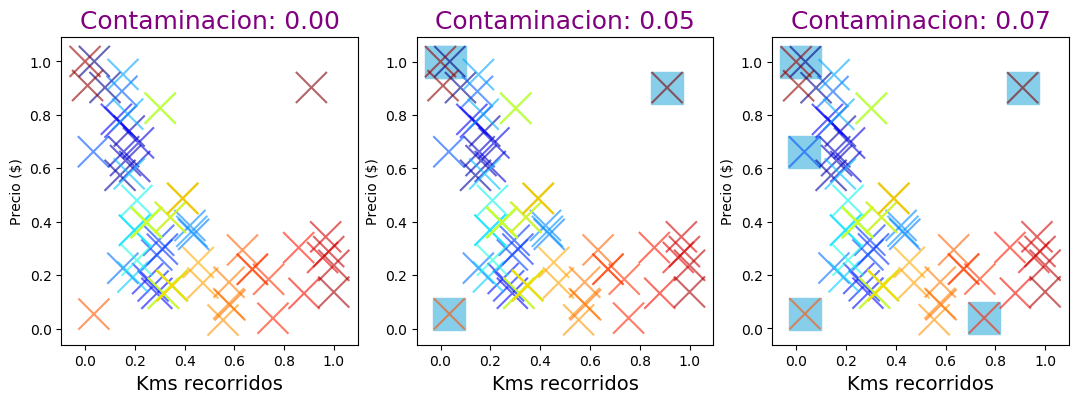

In [27]:
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(data[resultados[i]==-1][:, 0],
               data[resultados[i]==-1][:, 1],
               c="skyblue", marker="s", s=500)
    ax.scatter(data[:, 0],
               data[:, 1],
               c=range(data.size//2), marker="x",
               s=500, alpha=0.6)
    ax.set_title("Contaminacion: %0.2f" % c[i], size=18, color="purple")
    ax.set_ylabel("Precio ($)",size=10)
    ax.set_xlabel("Kms recorridos", size=14)
    
plt.show()    
    
    

In [30]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd  
import os 
from datetime import datetime 
import plotly.express as px 

from sklearn.ensemble import IsolationForest 
mpl.rcParams['figure.figsize']=(10, 8)
mpl.rcParams["axes.grid"]=False

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df= pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [35]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [38]:
fig=px.line(df.reset_index(),x='timestamp',y='value',title="NYC Taxi")
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [39]:
df['hour']=df.timestamp.dt.hour

In [40]:
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'),
                             categories=['Monday','Tuesday','wednesday','Thursday','Friday','Saturday','Sunday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
 2   hour       10320 non-null  int64         
 3   weekday    8832 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 252.4 KB


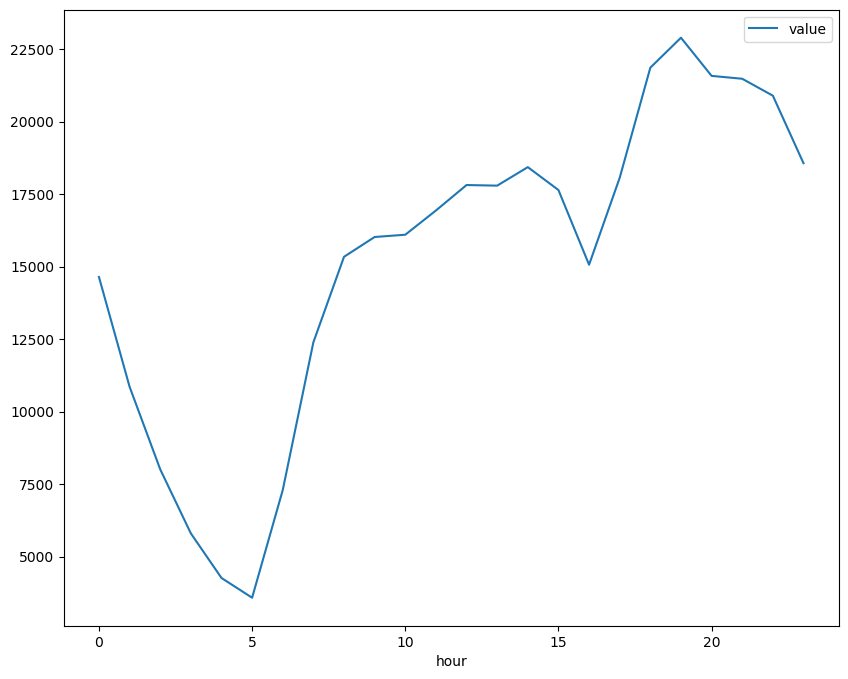

In [41]:
df[['value','hour']].groupby('hour').mean().plot()

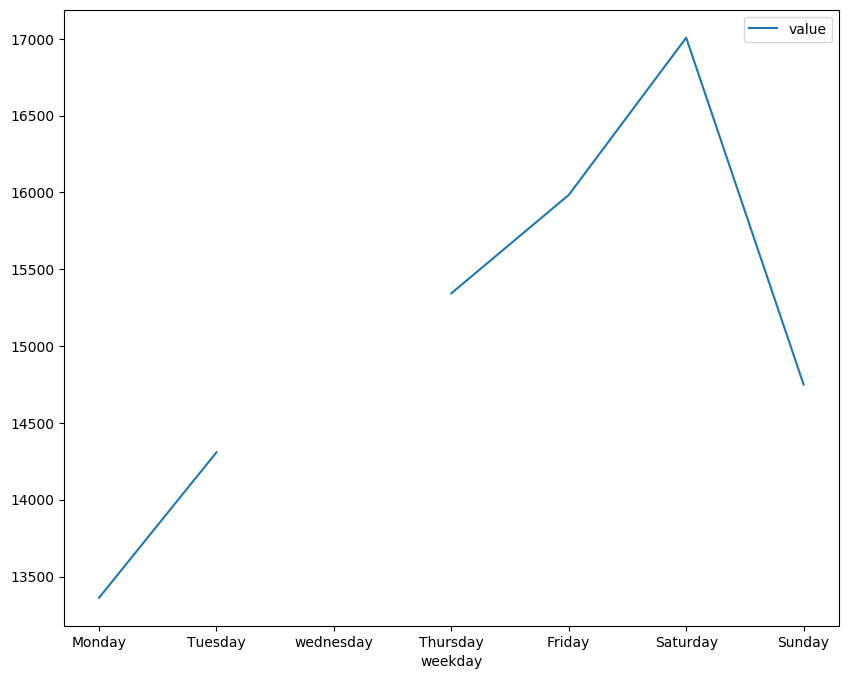

In [42]:
df[['value','weekday']].groupby('weekday').mean().plot()

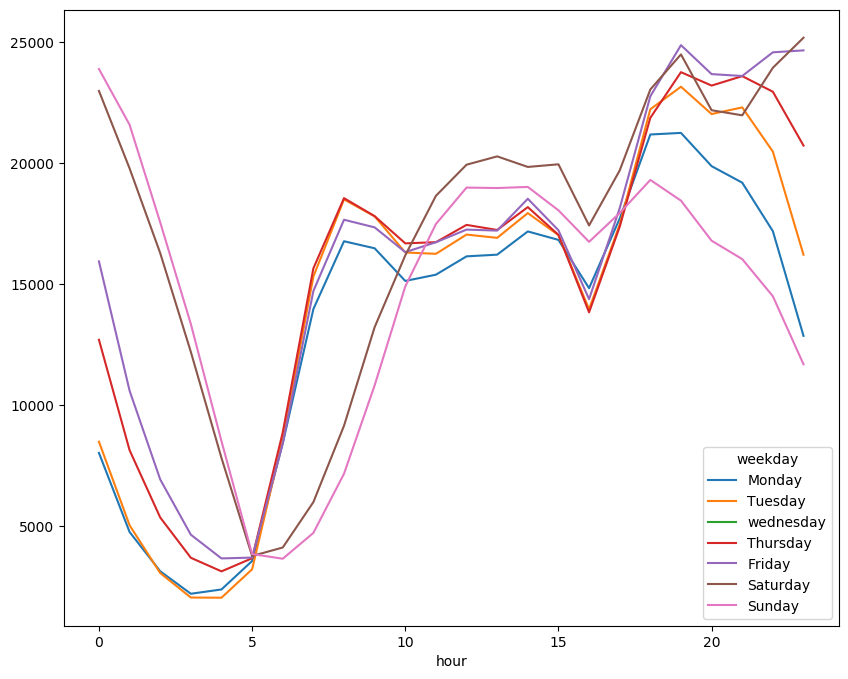

In [44]:
df.groupby(['hour','weekday']).mean()['value'].unstack().plot()

In [45]:
df.join(df.groupby(['hour','weekday'])['value'].mean(), on=['hour','weekday'],rsuffix='_avg')

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,10844,0,Tuesday,8483.709677
1,2014-07-01 00:30:00,8127,0,Tuesday,8483.709677
2,2014-07-01 01:00:00,6210,1,Tuesday,5028.193548
3,2014-07-01 01:30:00,4656,1,Tuesday,5028.193548
4,2014-07-01 02:00:00,3820,2,Tuesday,3052.112903
...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,Saturday,21983.241935
10316,2015-01-31 22:00:00,25721,22,Saturday,23949.951613
10317,2015-01-31 22:30:00,27309,22,Saturday,23949.951613
10318,2015-01-31 23:00:00,26591,23,Saturday,25192.516129


In [47]:
df_final=df.join(df.groupby(['hour','weekday'])['value'].mean(), on=['hour','weekday'],rsuffix='_avg')
df_final

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,10844,0,Tuesday,8483.709677
1,2014-07-01 00:30:00,8127,0,Tuesday,8483.709677
2,2014-07-01 01:00:00,6210,1,Tuesday,5028.193548
3,2014-07-01 01:30:00,4656,1,Tuesday,5028.193548
4,2014-07-01 02:00:00,3820,2,Tuesday,3052.112903
...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,Saturday,21983.241935
10316,2015-01-31 22:00:00,25721,22,Saturday,23949.951613
10317,2015-01-31 22:30:00,27309,22,Saturday,23949.951613
10318,2015-01-31 23:00:00,26591,23,Saturday,25192.516129


In [49]:
df_final.set_index('timestamp').loc['2014-11-02']

,value,hour,weekday,value_avg
timestamp,,,,
2014-11-02 00:00:00,25110,0,Sunday,23898.733333
2014-11-02 00:30:00,23109,0,Sunday,23898.733333
2014-11-02 01:00:00,39197,1,Sunday,21593.533333
2014-11-02 01:30:00,35212,1,Sunday,21593.533333
2014-11-02 02:00:00,13259,2,Sunday,17555.266667
2014-11-02 02:30:00,12250,2,Sunday,17555.266667
2014-11-02 03:00:00,10013,3,Sunday,13350.550000
2014-11-02 03:30:00,7898,3,Sunday,13350.550000
2014-11-02 04:00:00,6375,4,Sunday,8506.500000


In [50]:
df_final.set_index('timestamp').loc['2015-01-26':'2015-11-27']

,value,hour,weekday,value_avg
timestamp,,,,
2015-01-26 00:00:00,6663,0,Monday,8020.283333
2015-01-26 00:30:00,5151,0,Monday,8020.283333
2015-01-26 01:00:00,4092,1,Monday,4749.750000
2015-01-26 01:30:00,3207,1,Monday,4749.750000
2015-01-26 02:00:00,2626,2,Monday,3125.800000
...,...,...,...,...
2015-01-31 21:30:00,24670,21,Saturday,21983.241935
2015-01-31 22:00:00,25721,22,Saturday,23949.951613
2015-01-31 22:30:00,27309,22,Saturday,23949.951613


In [51]:
df_final['day']=df.timestamp.dt.weekday
df_final

,timestamp,value,hour,weekday,value_avg,day
0,2014-07-01 00:00:00,10844,0,Tuesday,8483.709677,1
1,2014-07-01 00:30:00,8127,0,Tuesday,8483.709677,1
2,2014-07-01 01:00:00,6210,1,Tuesday,5028.193548,1
3,2014-07-01 01:30:00,4656,1,Tuesday,5028.193548,1
4,2014-07-01 02:00:00,3820,2,Tuesday,3052.112903,1
...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,Saturday,21983.241935,5
10316,2015-01-31 22:00:00,25721,22,Saturday,23949.951613,5
10317,2015-01-31 22:30:00,27309,22,Saturday,23949.951613,5
10318,2015-01-31 23:00:00,26591,23,Saturday,25192.516129,5


In [53]:
data=df_final[['value','hour','day']]
data

,value,hour,day
0,10844,0,1
1,8127,0,1
2,6210,1,1
3,4656,1,1
4,3820,2,1
...,...,...,...
10315,24670,21,5
10316,25721,22,5
10317,27309,22,5
10318,26591,23,5


In [54]:
model=IsolationForest(contamination=0.005,max_features=3,max_samples=0.8,n_estimators=200)
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [56]:
df_final['Outliers']=pd.Series(model.predict(data)).apply(lambda x: 'yes' if (x==-1) else 'no')

In [58]:
df_final.query('Outliers=="yes"')

,timestamp,value,hour,weekday,value_avg,day,Outliers
37,2014-07-01 18:30:00,27598,18,Tuesday,22233.596774,1,yes
134,2014-07-03 19:00:00,29985,19,Thursday,23768.419355,3,yes
661,2014-07-14 18:30:00,26945,18,Monday,21190.150000,0,yes
2976,2014-09-01 00:00:00,14618,0,Monday,8020.283333,0,yes
2977,2014-09-01 00:30:00,12908,0,Monday,8020.283333,0,yes
2978,2014-09-01 01:00:00,10842,1,Monday,4749.750000,0,yes
3261,2014-09-06 22:30:00,30313,22,Saturday,23949.951613,5,yes
3262,2014-09-06 23:00:00,30373,23,Saturday,25192.516129,5,yes
5280,2014-10-19 00:00:00,28093,0,Sunday,23898.733333,6,yes
5954,2014-11-02 01:00:00,39197,1,Sunday,21593.533333,6,yes


In [60]:
fig=px.scatter(df_final ,x='timestamp', y='value', color='Outliers',
               hover_data=['weekday','hour','value_avg'],
               title='NYC taxis')

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [61]:
score=model.decision_function(data)

In [62]:
score

array([0.08599058, 0.12332709, 0.1342734 , ..., 0.08157473, 0.09069803,
       0.09803068])

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 3.000e+00, 1.000e+01, 5.000e+00, 1.100e+01, 1.300e+01,
        1.800e+01, 3.500e+01, 4.200e+01, 4.400e+01, 5.200e+01, 6.700e+01,
        8.500e+01, 1.250e+02, 1.520e+02, 1.810e+02, 2.300e+02, 3.270e+02,
        4.210e+02, 4.550e+02, 5.820e+02, 6.750e+02, 8.110e+02, 1.060e+03,
        1.140e+03, 1.105e+03, 7.340e+02, 6.550e+02, 4.690e+02, 4.430e+02,
        2.870e+02, 5.300e+01]),
 array([-0.16770927, -0.160258  , -0.15280672, -0.14535545, -0.13790417,
        -0.1304529 , -0.12300162, -0.11555035, -0.10809907, -0.10064779,
        -0.09319652, -0.08574524, -0.07829397, -0.07084269, -0.06339142,
        -0.05594014, -0.04848887, -0.04103759, -0.03358632, -0.02613504,
        -0.01868377, -0.01123249, -0.00378122,  0.00367006,  0.01112134,
         0.

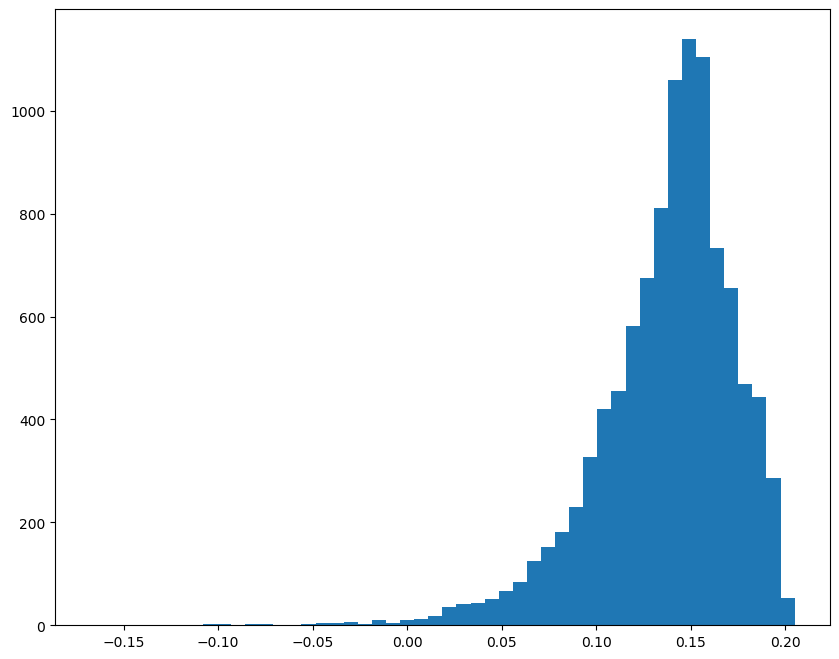

In [63]:
plt.hist(score, bins=50)

In [64]:
df_final['scores']=score

In [65]:
df_final

,timestamp,value,hour,weekday,value_avg,day,Outliers,scores
0,2014-07-01 00:00:00,10844,0,Tuesday,8483.709677,1,no,0.085991
1,2014-07-01 00:30:00,8127,0,Tuesday,8483.709677,1,no,0.123327
2,2014-07-01 01:00:00,6210,1,Tuesday,5028.193548,1,no,0.134273
3,2014-07-01 01:30:00,4656,1,Tuesday,5028.193548,1,no,0.151033
4,2014-07-01 02:00:00,3820,2,Tuesday,3052.112903,1,no,0.156357
...,...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,21,Saturday,21983.241935,5,no,0.139506
10316,2015-01-31 22:00:00,25721,22,Saturday,23949.951613,5,no,0.130957
10317,2015-01-31 22:30:00,27309,22,Saturday,23949.951613,5,no,0.081575
10318,2015-01-31 23:00:00,26591,23,Saturday,25192.516129,5,no,0.090698


In [67]:
df_final.query('scores<-0.02')

,timestamp,value,hour,weekday,value_avg,day,Outliers,scores
37,2014-07-01 18:30:00,27598,18,Tuesday,22233.596774,1,yes,-0.030079
134,2014-07-03 19:00:00,29985,19,Thursday,23768.419355,3,yes,-0.056708
661,2014-07-14 18:30:00,26945,18,Monday,21190.150000,0,yes,-0.033958
2976,2014-09-01 00:00:00,14618,0,Monday,8020.283333,0,yes,-0.031830
3261,2014-09-06 22:30:00,30313,22,Saturday,23949.951613,5,yes,-0.074512
3262,2014-09-06 23:00:00,30373,23,Saturday,25192.516129,5,yes,-0.084359
5280,2014-10-19 00:00:00,28093,0,Sunday,23898.733333,6,yes,-0.036078
5954,2014-11-02 01:00:00,39197,1,Sunday,21593.533333,6,yes,-0.167709
5955,2014-11-02 01:30:00,35212,1,Sunday,21593.533333,6,yes,-0.138261
8543,2014-12-25 23:30:00,7685,23,Thursday,20732.241935,3,yes,-0.029507
